# **Analisis Sentimen Mengenai Seks Bebas Di Indonesia**

# **1. Crawling Data**

proses pengambilan data dari twitter

In [1]:
#install library yang diperlukan
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install snscrape

#import bahan-bahan
import pandas as pd #dataframe
import snscrape.modules.twitter as sntwitter #crawling - jadi tidak memakai API

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-owesf_ln
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-owesf_ln
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 3dd9c28e31b8babeb2a187fbae994d9717ded168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev3+g3dd9c28-py3-none-any.whl size=72466 sha256=dbc53a0c3176efa69205ee79f0289d48a5673260a6fa661817d2330f21fe9985
  Stored in directory: /tmp/pip-ephem-wheel-cache-ga6s3fy5/wheels/1a/ba/e2/39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c95c1fd
Successfully built snscrape
Looking in indexes: https://pypi.org/simple, ht

In [2]:
#masukan jumlah data yang akan di crawling
maxTweets = 2000 #disini mengambil 2000 data

In [3]:
data_tweets = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('seks bebas since:2023-01-01 until:2023-04-13 lang:id').get_items()):      #dengan keyword seks bebas selama tahun 2023 
    if i>maxTweets:
        break
    data_tweets.append([tweet.date, tweet.id, tweet.username, tweet.user.location, tweet.lang, tweet.hashtags, tweet.content.encode("utf-8")])

<ipython-input-3-9f9a06b582cf>:6: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  data_tweets.append([tweet.date, tweet.id, tweet.username, tweet.user.location, tweet.lang, tweet.hashtags, tweet.content.encode("utf-8")])
<ipython-input-3-9f9a06b582cf>:6: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  data_tweets.append([tweet.date, tweet.id, tweet.username, tweet.user.location, tweet.lang, tweet.hashtags, tweet.content.encode("utf-8")])


In [4]:
#menampilkan data yang sudah dicrawling
tweets = pd.DataFrame(data_tweets, columns=['Datetime', 'Tweet Id', 'Username', 'Location', 'Language', 'Hashtags', 'Text'])

tweets

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,,in,None,b'@FiinaDu Semoga anak keturunan kita terhinda...
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,None,b'Pendidikan seks dan kespro diajarin di sekol...
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,,in,None,b'Salah satu bentuk kriminalitas yang lain ada...
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,None,b'@mantriss Kalau di afganistan..anak2 perempu...
4,2023-04-12 21:28:05+00:00,1646263945509081088,Mumthaz25056309,,in,None,b'Salah satu bentuk kriminalitas yang lain ada...
...,...,...,...,...,...,...,...
1996,2023-01-04 01:34:36+00:00,1610449585926995969,Alpha_Phoenix__,"Babelan, Indonesia",in,None,"b'""Well sangat mudah mempidanakan bapak""\n\nOr..."
1997,2023-01-04 01:27:18+00:00,1610447747496423428,Alpha_Phoenix__,"Babelan, Indonesia",in,None,"b'Nah, gw mau tahu nih penyebab org menderita ..."
1998,2023-01-04 01:18:29+00:00,1610445530248929285,rounderzx,Republic of Mozambique,in,None,b'@jagatperkasaa @counttall__ @bobbynasution_ ...
1999,2023-01-04 01:17:24+00:00,1610445256868368385,sep_andryy,"Cirebon, Jawa Barat",in,None,b'@ESyarkosi Stop seks bebas gak masuk list? \...


In [5]:
#simpan kedalam csv
tweets.to_csv('crawling_seksbebas.csv', sep=',', index=False)

# **2. Preprocessing Data**

Tahapan untuk membersihkan data dari fitur-fitur yang tidak diinginkan. Tahapan yang dilakukan: Remove user, Cleaning, Case Folding, Tokenisasi, Stopword Removal, dan Stemming

In [6]:
#masukan modul yang dibutuhkan
import pandas as pd
import numpy as np
import nltk
import string
import re

In [7]:
#masukan data kembali yang akan diproses
def load_data():
    data_tweets = pd.read_csv('crawling_seksbebas.csv')
    return data_tweets

tweets = load_data()
tweets.head() #tampilkan bagian atas saja

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,NaN,in,NaN,b'@FiinaDu Semoga anak keturunan kita terhinda...
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,NaN,b'Pendidikan seks dan kespro diajarin di sekol...
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,NaN,b'@mantriss Kalau di afganistan..anak2 perempu...
4,2023-04-12 21:28:05+00:00,1646263945509081088,Mumthaz25056309,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...


In [8]:
#menghapus username dalam tweet
def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
tweets['remove_user'] = np.vectorize(remove_pattern)(tweets['Text'], "@[\w]*")

In [9]:
#cleaning
def cleaning(Text):
    Text = re.sub(r'\$\w*', '', Text)
    Text = re.sub(r'^rt[\s]+', '', Text)
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)
    Text = re.sub('&quot;'," ", Text)
    Text = re.sub(r"\d+", " ", str(Text))
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))
    Text = re.sub(r"[^\w\s]", " ", str(Text))
    Text = re.sub(r'(.)\1+', r'\1\1', Text)
    Text = re.sub(r"\s+", " ", str(Text))
    Text = re.sub(r'#', '', Text)
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))
    Text = re.sub(r'\b\w{1,2}\b', '', Text)
    Text = re.sub(r'\s\s+', ' ', Text)
    Text = re.sub(r'^RT[\s]+', '', Text)
    Text = re.sub(r'^b[\s]+', '', Text)
    Text = re.sub(r'^link[\s]+', '', Text)
    return Text

tweets['cleaning'] = tweets['remove_user'].apply(cleaning)

In [10]:
#case folding - ubah jadi huruf kecil
tweets['case_folding'] = tweets['cleaning'].str.lower()

In [11]:
#tokenisasi - membagi kalimat jadi perkata (dipisah)
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

def word_tokenize_wrapper(Text):
    return word_tokenize(Text)

tweets['tokenisasi'] = tweets['case_folding'].apply(lambda x: word_tokenize_wrapper(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
#stopword removal - menghapus kata sesuai dengan kamus indonesia
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'om', 'pru', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'n', 'anjir'])

list_stopwords = set(list_stopwords)

def stopwords_removal(Text):
  return [word for word in Text if word not in list_stopwords]

tweets['stopword_removal'] = tweets['tokenisasi'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#stemming - menghapus imbuhan
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Text in tweets['stopword_removal']:
  for term in Text:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Text):
  return [term_dict[term] for term in Text]

tweets['stemming'] = tweets['stopword_removal'].swifter.apply(apply_stemmed_term)

Streaming output truncated to the last 5000 lines.
podo : podo
nakaal : nakaal
wes : wes
karo : karo
mesakne : mesakne
mergo : mergo
iku : iku
hasil : hasil
soko : soko
wonge : wonge
nmakane : nmakane
sing : sing
omong : omong
enek : enek
rugine : rugine
lakbanen : lakbanen
cocot : cocot
gen : gen
nambah : nambah
doso : doso
maneh : maneh
ninget : ninget
poro : poro
wadun : wadun
uakeh : uakeh
kowe : kowe
ora : ora
bali : bal
kontol : kontol
pereda : reda
nyeri : nyeri
cowoknya : cowok
salahin : salahin
ceweknya : cewek
sick : sick
nasab : nasab
sepenuhny : sepenuhny
blm : blm
jdi : jdi
disuruh : suruh
jwb : jwb
wlwpun : wlwpun
spermanya : sperma
dipihak : pihak
hufftt : hufftt
aplgi : aplgi
bye : bye
diharapkan : harap
hasilnya : hasil
emas : emas
perak : perak
kanker : kanker
serviks : serviks
disebabkan : sebab
papilloma : papilloma
virus : virus
bis : bis
kebersihan : bersih
intim : intim
paparan : papar
dakwah : dakwah
permasalahan : masalah
wkwkwkw : wkwkwkw
ego : ego
nkan : nkan

Pandas Apply:   0%|          | 0/2001 [00:00<?, ?it/s]

In [14]:
tweets.head()

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text,remove_user,cleaning,case_folding,tokenisasi,stopword_removal,stemming
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,NaN,in,NaN,b'@FiinaDu Semoga anak keturunan kita terhinda...,b' Semoga anak keturunan kita terhindar dari s...,Semoga anak keturunan kita terhindar dari sek...,semoga anak keturunan kita terhindar dari sek...,"[semoga, anak, keturunan, kita, terhindar, dar...","[semoga, anak, keturunan, terhindar, seks, bebas]","[moga, anak, turun, hindar, seks, bebas]"
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,NaN,b'Pendidikan seks dan kespro diajarin di sekol...,b'Pendidikan seks dan kespro diajarin di sekol...,Pendidikan seks dan kespro diajarin sekolah b...,pendidikan seks dan kespro diajarin sekolah b...,"[pendidikan, seks, dan, kespro, diajarin, seko...","[pendidikan, seks, kespro, diajarin, sekolah, ...","[didik, seks, kespro, diajarin, sekolah, cegah..."
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...,b'Salah satu bentuk kriminalitas yang lain ada...,Salah satu bentuk kriminalitas yang lain adal...,salah satu bentuk kriminalitas yang lain adal...,"[salah, satu, bentuk, kriminalitas, yang, lain...","[salah, bentuk, kriminalitas, pergaulan, bebas...","[salah, bentuk, kriminalitas, gaul, bebas, sis..."
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,NaN,b'@mantriss Kalau di afganistan..anak2 perempu...,b' Kalau di afganistan..anak2 perempuan cuman ...,Kalau afganistan anak perempuan cuman dpt pen...,kalau afganistan anak perempuan cuman dpt pen...,"[kalau, afganistan, anak, perempuan, cuman, dp...","[afganistan, anak, perempuan, cuman, dpt, pend...","[afganistan, anak, perempuan, cuman, dpt, didi..."
4,2023-04-12 21:28:05+00:00,1646263945509081088,Mumthaz25056309,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...,b'Salah satu bentuk kriminalitas yang lain ada...,Salah satu bentuk kriminalitas yang lain adal...,salah satu bentuk kriminalitas yang lain adal...,"[salah, satu, bentuk, kriminalitas, yang, lain...","[salah, bentuk, kriminalitas, pergaulan, bebas...","[salah, bentuk, kriminalitas, gaul, bebas, sis..."


In [15]:
#buat stemming bebas dari kurung siku
stemming = tweets[['stemming']]

def fit_stemming(text):
    text = np.array(text)
    text = ' '.join(text)
    
    return text

tweets['stemming'] = tweets['stemming'].apply(lambda x: fit_stemming(x))
tweets.head()

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text,remove_user,cleaning,case_folding,tokenisasi,stopword_removal,stemming
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,NaN,in,NaN,b'@FiinaDu Semoga anak keturunan kita terhinda...,b' Semoga anak keturunan kita terhindar dari s...,Semoga anak keturunan kita terhindar dari sek...,semoga anak keturunan kita terhindar dari sek...,"[semoga, anak, keturunan, kita, terhindar, dar...","[semoga, anak, keturunan, terhindar, seks, bebas]",moga anak turun hindar seks bebas
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,NaN,b'Pendidikan seks dan kespro diajarin di sekol...,b'Pendidikan seks dan kespro diajarin di sekol...,Pendidikan seks dan kespro diajarin sekolah b...,pendidikan seks dan kespro diajarin sekolah b...,"[pendidikan, seks, dan, kespro, diajarin, seko...","[pendidikan, seks, kespro, diajarin, sekolah, ...",didik seks kespro diajarin sekolah cegah seks ...
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...,b'Salah satu bentuk kriminalitas yang lain ada...,Salah satu bentuk kriminalitas yang lain adal...,salah satu bentuk kriminalitas yang lain adal...,"[salah, satu, bentuk, kriminalitas, yang, lain...","[salah, bentuk, kriminalitas, pergaulan, bebas...",salah bentuk kriminalitas gaul bebas sistem ku...
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,NaN,b'@mantriss Kalau di afganistan..anak2 perempu...,b' Kalau di afganistan..anak2 perempuan cuman ...,Kalau afganistan anak perempuan cuman dpt pen...,kalau afganistan anak perempuan cuman dpt pen...,"[kalau, afganistan, anak, perempuan, cuman, dp...","[afganistan, anak, perempuan, cuman, dpt, pend...",afganistan anak perempuan cuman dpt didik form...
4,2023-04-12 21:28:05+00:00,1646263945509081088,Mumthaz25056309,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...,b'Salah satu bentuk kriminalitas yang lain ada...,Salah satu bentuk kriminalitas yang lain adal...,salah satu bentuk kriminalitas yang lain adal...,"[salah, satu, bentuk, kriminalitas, yang, lain...","[salah, bentuk, kriminalitas, pergaulan, bebas...",salah bentuk kriminalitas gaul bebas sistem ku...


In [16]:
#filter kalimat duplikat dari kolom stemming
tweets.drop_duplicates(subset = "stemming", keep = 'first', inplace = True)
tweets

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text,remove_user,cleaning,case_folding,tokenisasi,stopword_removal,stemming
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,NaN,in,NaN,b'@FiinaDu Semoga anak keturunan kita terhinda...,b' Semoga anak keturunan kita terhindar dari s...,Semoga anak keturunan kita terhindar dari sek...,semoga anak keturunan kita terhindar dari sek...,"[semoga, anak, keturunan, kita, terhindar, dar...","[semoga, anak, keturunan, terhindar, seks, bebas]",moga anak turun hindar seks bebas
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,NaN,b'Pendidikan seks dan kespro diajarin di sekol...,b'Pendidikan seks dan kespro diajarin di sekol...,Pendidikan seks dan kespro diajarin sekolah b...,pendidikan seks dan kespro diajarin sekolah b...,"[pendidikan, seks, dan, kespro, diajarin, seko...","[pendidikan, seks, kespro, diajarin, sekolah, ...",didik seks kespro diajarin sekolah cegah seks ...
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,NaN,in,NaN,b'Salah satu bentuk kriminalitas yang lain ada...,b'Salah satu bentuk kriminalitas yang lain ada...,Salah satu bentuk kriminalitas yang lain adal...,salah satu bentuk kriminalitas yang lain adal...,"[salah, satu, bentuk, kriminalitas, yang, lain...","[salah, bentuk, kriminalitas, pergaulan, bebas...",salah bentuk kriminalitas gaul bebas sistem ku...
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,NaN,b'@mantriss Kalau di afganistan..anak2 perempu...,b' Kalau di afganistan..anak2 perempuan cuman ...,Kalau afganistan anak perempuan cuman dpt pen...,kalau afganistan anak perempuan cuman dpt pen...,"[kalau, afganistan, anak, perempuan, cuman, dp...","[afganistan, anak, perempuan, cuman, dpt, pend...",afganistan anak perempuan cuman dpt didik form...
6,2023-04-12 20:49:54+00:00,1646254338103463936,FiinaDu,NaN,in,NaN,b'Ngerinya pacaran remaja.\nSeks menjadikan bu...,b'Ngerinya pacaran remaja.\nSeks menjadikan bu...,Ngerinya pacaran remaja nSeks menjadikan buci...,ngerinya pacaran remaja nseks menjadikan buci...,"[ngerinya, pacaran, remaja, nseks, menjadikan,...","[ngerinya, pacaran, remaja, nseks, menjadikan,...",ngeri pacar remaja nseks jadi bucin emosi kend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2023-01-04 01:34:36+00:00,1610449585926995969,Alpha_Phoenix__,"Babelan, Indonesia",in,NaN,"b'""Well sangat mudah mempidanakan bapak""\n\nOr...","b'""Well sangat mudah mempidanakan bapak""\n\nOr...",Well sangat mudah mempidanakan bapak nOrang b...,well sangat mudah mempidanakan bapak norang b...,"[well, sangat, mudah, mempidanakan, bapak, nor...","[well, mudah, mempidanakan, norang, berpenyaki...",well mudah pidana norang sakit pakai cancel cu...
1997,2023-01-04 01:27:18+00:00,1610447747496423428,Alpha_Phoenix__,"Babelan, Indonesia",in,NaN,"b'Nah, gw mau tahu nih penyebab org menderita ...","b'Nah, gw mau tahu nih penyebab org menderita ...",Nah mau tahu nih penyebab org menderita ODHOV...,nah mau tahu nih penyebab org menderita odhov...,"[nah, mau, tahu, nih, penyebab, org, menderita...","[penyebab, org, menderita, odhov, scr, kronolo...",sebab org derita odhov scr kronologis spt nklo...
1998,2023-01-04 01:18:29+00:00,1610445530248929285,rounderzx,Republic of Mozambique,in,NaN,b'@jagatperkasaa @counttall__ @bobbynasution_ ...,"b' Emang ada norma hukumnya untuk lgbt?, sed...",Emang ada norma hukumnya untuk lgbt sedangkan...,emang ada norma hukumnya untuk lgbt sedangkan...,"[emang, ada, norma, hukumnya, untuk, lgbt, sed...","[emang, norma, hukumnya, lgbt, banci, prostitu...",emang norma hukum lgbt banci prostitusi liar u...
1999,2023-01-04 01:17:24+00:00,1610445256868368385,sep_andryy,"Cirebon, Jawa Barat",in,NaN,b'@ESyarkosi Stop seks bebas gak masuk list? \...,b' Stop seks bebas gak masuk list? \xf0\x9f\x9...,Stop seks bebas gak masuk list,stop seks bebas gak masuk list,"[stop, seks, bebas, gak, masuk, list]","[stop, seks, bebas, masuk, list]",stop se

In [17]:
#simpan kedalam csv
tweets.to_csv('preprocessing_seksbebas.csv', sep=',', index=False)

# **3. Labeling Sentimen**

Tahap ini memakai modul vader lexicon, jadi data harus ditranslate du kedalam bahasa inggris agar bisa diproses nantinya.

In [4]:
#modul yang dibutuhkan untuk translate
!pip install googletrans==3.1.0a0
import pandas as pd
import googletrans
from googletrans import Translator
translator = Translator()
pd.set_option('max_colwidth', 300)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import modul yang dibuthkan labelin vader
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#masukan data hasil preprocessing
tweets = pd.read_csv('preprocessing_seksbebas.csv')
tweets.head()

,Datetime,Tweet Id,Username,Location,Language,Hashtags,Text,remove_user,cleaning,case_folding,tokenisasi,stopword_removal,stemming
0,2023-04-12 23:28:40+00:00,1646294290757459972,Mfi122,NaN,in,NaN,b'@FiinaDu Semoga anak keturunan kita terhindar dari seks bebas....',b' Semoga anak keturunan kita terhindar dari seks bebas....',Semoga anak keturunan kita terhindar dari seks bebas,semoga anak keturunan kita terhindar dari seks bebas,"['semoga', 'anak', 'keturunan', 'kita', 'terhindar', 'dari', 'seks', 'bebas']","['semoga', 'anak', 'keturunan', 'terhindar', 'seks', 'bebas']",moga anak turun hindar seks bebas
1,2023-04-12 23:17:30+00:00,1646291482872250369,craftyriniputri,Indonesia,in,NaN,"b'Pendidikan seks dan kespro diajarin di sekolah bisa cegah seks bebas? Hmmm, tergantung kontennya, kalau isinya justru menjadi maklumat baru, bisa2 bukannya mencegah malah mengompori https://t.co/iQGQrJ17G5'","b'Pendidikan seks dan kespro diajarin di sekolah bisa cegah seks bebas? Hmmm, tergantung kontennya, kalau isinya justru menjadi maklumat baru, bisa2 bukannya mencegah malah mengompori https://t.co/iQGQrJ17G5'",Pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas Hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"['pendidikan', 'seks', 'dan', 'kespro', 'diajarin', 'sekolah', 'bisa', 'cegah', 'seks', 'bebas', 'hmm', 'tergantung', 'kontennya', 'kalau', 'isinya', 'justru', 'menjadi', 'maklumat', 'baru', 'bisa', 'bukannya', 'mencegah', 'malah', 'mengompori']","['pendidikan', 'seks', 'kespro', 'diajarin', 'sekolah', 'cegah', 'seks', 'bebas', 'hmm', 'tergantung', 'kontennya', 'isinya', 'maklumat', 'mencegah', 'mengompori']",didik seks kespro diajarin sekolah cegah seks bebas hmm gantung konten isi maklumat cegah kompor
2,2023-04-12 22:47:37+00:00,1646283961214304257,tia_ummufathin,NaN,in,NaN,"b'Salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas. Sistem kufur tak memerhatikan sama sekali tentang persoalan ini. Sistem itu justru mempertuhankan hawa nafsu. Bagi sistem tersebut, hubungan seks diperbolehkan selama tidak merugikan orang lain. https://t.co/6Jwgn22B1c'","b'Salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas. Sistem kufur tak memerhatikan sama sekali tentang persoalan ini. Sistem itu justru mempertuhankan hawa nafsu. Bagi sistem tersebut, hubungan seks diperbolehkan selama tidak merugikan orang lain. https://t.co/6Jwgn22B1c'",Salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas Sistem kufur tak memerhatikan sama sekali tentang persoalan ini Sistem itu justru mempertuhankan hawa nafsu Bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"['salah', 'satu', 'bentuk', 'kriminalitas', 'yang', 'lain', 'adalah', 'tentang', 'pergaulan', 'bebas', 'sistem', 'kufur', 'tak', 'memerhatikan', 'sama', 'sekali', 'tentang', 'persoalan', 'ini', 'sistem', 'itu', 'justru', 'mempertuhankan', 'hawa', 'nafsu', 'bagi', 'sistem', 'tersebut', 'hubungan'...","['salah', 'bentuk', 'kriminalitas', 'pergaulan', 'bebas', 'sistem', 'kufur', 'memerhatikan', 'sistem', 'mempertuhankan', 'hawa', 'nafsu', 'sistem', 'hubungan', 'seks', 'diperbolehkan', 'merugikan', 'orang']",salah bentuk kriminalitas gaul bebas sistem kufur perhati sistem tuhan hawa nafsu sistem hubung seks boleh rugi orang
3,2023-04-12 22:32:44+00:00,1646280217072398336,irwan24tanjung,"Bogor Selatan, Indonesia",in,NaN,"b'@mantriss Kalau di afganistan..anak2 perempuan cuman gk dpt pendidikan formal..\n\nTp di negeri ini, ribua

In [7]:
# cari bahasa
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
lang_df.head()

,Language
af,afrikaans
sq,albanian
am,amharic
ar,arabic
hy,armenian


In [8]:
# cari code indonesia, dan inggris
lang_df[lang_df.Language.isin(['english', 'indonesian'])]

,Language
en,english
id,indonesian


In [9]:
translate = pd.DataFrame(tweets['case_folding']) #disini labelin menggunakan kolom case_folding karena text masih lengkap agar nntinya tidak memperngaruhi sentimen - jdi yg ditranslate kolom sentimen
translate['english_case_folding'] = translate['case_folding'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
translate.head()

,case_folding,english_case_folding
0,semoga anak keturunan kita terhindar dari seks bebas,I hope our offspring will be spared from free sex
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"Schools teach sex and reproductive health education, it can prevent free sex. Well, it depends on the content."
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"Another form of crime is about promiscuity, the Kufr system does not pay any attention to this problem, the system actually deifies the lust for the system, sex is allowed as long as it does not harm other people"
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,if afghanistan girls only get formal education then this country thousands of girls fall into free sex as a result of the bad social system created by the state
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,the horror of going out with teenagers for sex makes bucin until emotions are under control nthe abuse of david starts from dating that goes too far and practices free sex


In [10]:
#proses pengskoran/pembobotan kata

sid.polarity_scores(translate.loc[0]['english_case_folding'])
translate['scores'] = translate['english_case_folding'].apply(lambda x : sid.polarity_scores(str(x)))
translate.head()

,case_folding,english_case_folding,scores
0,semoga anak keturunan kita terhindar dari seks bebas,I hope our offspring will be spared from free sex,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}"
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"Schools teach sex and reproductive health education, it can prevent free sex. Well, it depends on the content.","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6705}"
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"Another form of crime is about promiscuity, the Kufr system does not pay any attention to this problem, the system actually deifies the lust for the system, sex is allowed as long as it does not harm other people","{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'compound': -0.7414}"
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,if afghanistan girls only get formal education then this country thousands of girls fall into free sex as a result of the bad social system created by the state,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'compound': 0.2023}"
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,the horror of going out with teenagers for sex makes bucin until emotions are under control nthe abuse of david starts from dating that goes too far and practices free sex,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'compound': -0.6808}"


In [11]:
#penjumlahan skor 
translate['compound']  = translate['scores'].apply(lambda score_dict: score_dict['compound'])

translate.head()

,case_folding,english_case_folding,scores,compound
0,semoga anak keturunan kita terhindar dari seks bebas,I hope our offspring will be spared from free sex,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}",0.7351
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"Schools teach sex and reproductive health education, it can prevent free sex. Well, it depends on the content.","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6705}",0.6705
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"Another form of crime is about promiscuity, the Kufr system does not pay any attention to this problem, the system actually deifies the lust for the system, sex is allowed as long as it does not harm other people","{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'compound': -0.7414}",-0.7414
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,if afghanistan girls only get formal education then this country thousands of girls fall into free sex as a result of the bad social system created by the state,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'compound': 0.2023}",0.2023
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,the horror of going out with teenagers for sex makes bucin until emotions are under control nthe abuse of david starts from dating that goes too far and practices free sex,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'compound': -0.6808}",-0.6808


In [12]:
#pelabelan skor dengan 3 kelas
def condition(c):
    if c>=0.0001:
        return "positif"
    elif c==0.0000:
        return "neutral"
    else:
        return 'negatif'

translate['sentimen'] = translate['compound'].apply(condition)
 
translate.head()

,case_folding,english_case_folding,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari seks bebas,I hope our offspring will be spared from free sex,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"Schools teach sex and reproductive health education, it can prevent free sex. Well, it depends on the content.","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6705}",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"Another form of crime is about promiscuity, the Kufr system does not pay any attention to this problem, the system actually deifies the lust for the system, sex is allowed as long as it does not harm other people","{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'compound': -0.7414}",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,if afghanistan girls only get formal education then this country thousands of girls fall into free sex as a result of the bad social system created by the state,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'compound': 0.2023}",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,the horror of going out with teenagers for sex makes bucin until emotions are under control nthe abuse of david starts from dating that goes too far and practices free sex,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'compound': -0.6808}",-0.6808,negatif


In [16]:
#mengubah nama kolom data frame
translate.columns = translate.columns.str.replace('case_folding', 'text_tweet_clean')
translate.head()

,text_tweet_clean,english_text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari seks bebas,I hope our offspring will be spared from free sex,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"Schools teach sex and reproductive health education, it can prevent free sex. Well, it depends on the content.","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6705}",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"Another form of crime is about promiscuity, the Kufr system does not pay any attention to this problem, the system actually deifies the lust for the system, sex is allowed as long as it does not harm other people","{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'compound': -0.7414}",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,if afghanistan girls only get formal education then this country thousands of girls fall into free sex as a result of the bad social system created by the state,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'compound': 0.2023}",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,the horror of going out with teenagers for sex makes bucin until emotions are under control nthe abuse of david starts from dating that goes too far and practices free sex,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'compound': -0.6808}",-0.6808,negatif


In [22]:
#menghapus kolom translate
del(translate["english_text_tweet_clean"])
translate.head()

,text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari seks bebas,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah bisa cegah seks bebas hmm tergantung kontennya kalau isinya justru menjadi maklumat baru bisa bukannya mencegah malah mengompori,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6705}",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adalah tentang pergaulan bebas sistem kufur tak memerhatikan sama sekali tentang persoalan ini sistem itu justru mempertuhankan hawa nafsu bagi sistem tersebut hubungan seks diperbolehkan selama tidak merugikan orang lain,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'compound': -0.7414}",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pendidikan formal ntp negeri ini ribuan anak perempuan terjerumus dalam seks bebas akibat buruknya sistem sosial diciptakan oleh negara,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'compound': 0.2023}",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan bucin sampai emosi terkendali npenganiayaan david bermula dari pacaran yang kebablasan dan praktik seks bebas,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'compound': -0.6808}",-0.6808,negatif


In [23]:
#simpan kedalam csv
translate.to_csv('labelin_seksbebas.csv', sep=',', index=False)

# **4. Topic Modeling**

Menggunakan Latent Dirichlet Allocation (LDA) dan Word2Vec

**a. LDA**

In [1]:
#install modul 
!pip install stopwordsiso
!pip install fuzzywuzzy[speedup]
!pip install spacy
!pip install swifter
!pip install Sastrawi
!pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import modul
import pandas as pd
import nltk
import ast
import os

from fuzzywuzzy import fuzz

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
#panggil data
tweets_lda = pd.read_csv('labelin_seksbebas.csv')
tweets_lda.head()

,text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari sek...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah b...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adal...,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pen...,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'com...",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan buci...,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'co...",-0.6808,negatif


In [6]:
tweets_lda['text_tweet_clean'].loc[1:5]

1     pendidikan seks dan kespro diajarin sekolah b...
2     salah satu bentuk kriminalitas yang lain adal...
3     kalau afganistan anak perempuan cuman dpt pen...
4     ngerinya pacaran remaja nseks menjadikan buci...
5     imo this all rooted sex education selama eduk...
Name: text_tweet_clean, dtype: object

In [7]:
mask = [isinstance(item, (str, bytes)) for item in tweets_lda['text_tweet_clean']]
print(tweets_lda.loc[mask])

                                       text_tweet_clean  \
0      semoga anak keturunan kita terhindar dari sek...   
1      pendidikan seks dan kespro diajarin sekolah b...   
2      salah satu bentuk kriminalitas yang lain adal...   
3      kalau afganistan anak perempuan cuman dpt pen...   
4      ngerinya pacaran remaja nseks menjadikan buci...   
...                                                 ...   
1871   well sangat mudah mempidanakan bapak norang b...   
1872   nah mau tahu nih penyebab org menderita odhov...   
1873   emang ada norma hukumnya untuk lgbt sedangkan...   
1874                    stop seks bebas gak masuk list    
1875   dalam nama tuhan yesus yang disurga nsemoga o...   

                                                 scores  compound sentimen  
0     {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...    0.7351  positif  
1     {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...    0.6705  positif  
2     {'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...   -0

In [8]:
#gensim
!pip install gensim
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#ubah menjadi token lagi
word_tokens = tweets_lda['text_tweet_clean'].values.tolist()
data_tokens = list(sent_to_words(word_tokens))

data_tokens[0:3]

[['semoga', 'anak', 'keturunan', 'kita', 'terhindar', 'dari', 'seks', 'bebas'],
 ['pendidikan',
  'seks',
  'dan',
  'kespro',
  'diajarin',
  'sekolah',
  'bisa',
  'cegah',
  'seks',
  'bebas',
  'hmm',
  'tergantung',
  'kontennya',
  'kalau',
  'isinya',
  'justru',
  'menjadi',
  'maklumat',
  'baru',
  'bisa',
  'bukannya',
  'mencegah',
  'malah',
  'mengompori'],
 ['salah',
  'satu',
  'bentuk',
  'kriminalitas',
  'yang',
  'lain',
  'adalah',
  'tentang',
  'pergaulan',
  'bebas',
  'sistem',
  'kufur',
  'tak',
  'memerhatikan',
  'sama',
  'sekali',
  'tentang',
  'persoalan',
  'ini',
  'sistem',
  'itu',
  'justru',
  'mempertuhankan',
  'hawa',
  'nafsu',
  'bagi',
  'sistem',
  'tersebut',
  'hubungan',
  'seks',
  'diperbolehkan',
  'selama',
  'tidak',
  'merugikan',
  'orang',
  'lain']]

In [10]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [11]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)

In [12]:
from gensim import corpora, models

#  dictionary
dictionary = corpora.Dictionary(data_tokens)

#  corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [13]:
print(corpus[1])

[(1, 1), (5, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [14]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  return model_list, coherence_values

In [ ]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, 
                                                    data_tokens, num_topics)

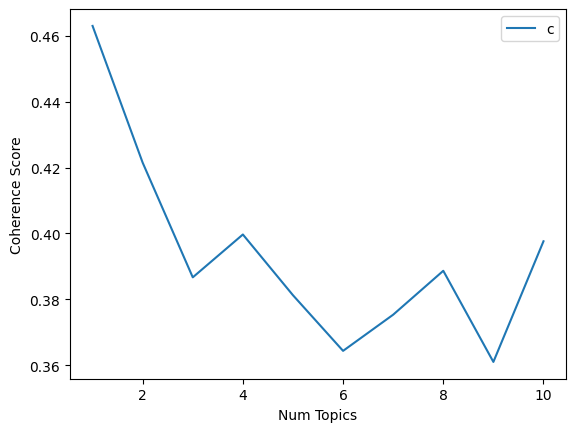

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [17]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.463064
1,2,0.421509
2,3,0.386674
3,4,0.399695
4,5,0.381240
5,6,0.364337
6,7,0.375332
7,8,0.388666
8,9,0.360978
9,10,0.397634


In [18]:
# buat LDA Model
model = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary)

In [19]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.038*"seks" + 0.038*"bebas" + 0.010*"dan" + 0.008*"hiv_aids" + 0.007*"itu" + 0.007*"live_muslimah" + 0.007*"yang" + 0.006*"ada" + 0.005*"udah" + 0.005*"anak"

Topic 2:
Word: 0.038*"seks" + 0.035*"bebas" + 0.009*"dan" + 0.009*"yang" + 0.009*"ada" + 0.009*"itu" + 0.007*"tapi" + 0.006*"mereka" + 0.006*"kalo" + 0.006*"aja"

Topic 3:
Word: 0.048*"seks" + 0.048*"bebas" + 0.013*"dan" + 0.012*"yang" + 0.011*"itu" + 0.008*"ini" + 0.007*"ada" + 0.006*"anak" + 0.006*"aja" + 0.005*"sama"

Topic 4:
Word: 0.026*"bebas" + 0.024*"seks" + 0.015*"dan" + 0.008*"itu" + 0.007*"dari" + 0.006*"yang" + 0.006*"gak" + 0.005*"bisa" + 0.005*"banyak" + 0.004*"anak"

Topic 5:
Word: 0.020*"seks" + 0.019*"bebas" + 0.009*"yang" + 0.009*"dan" + 0.006*"live_muslimah" + 0.006*"anak" + 0.005*"ada" + 0.005*"orang" + 0.005*"tidak" + 0.005*"untuk"

Topic 6:
Word: 0.017*"seks" + 0.016*"bebas" + 0.007*"aja" + 0.006*"ini" + 0.006*"tanggung_jawab" + 0.005*"anak" + 0.005*"dia" + 0.005*"sama" + 0.004*"dan" + 0.004*

In [20]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

In [22]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9065,"bebas, seks, dan, itu, dari, yang, gak, bisa, ...","[semoga, anak, keturunan, kita, terhindar, dar..."
1,1,1,0.6236,"seks, bebas, dan, yang, ada, itu, tapi, mereka...","[pendidikan, seks, dan, kespro, diajarin, seko..."
2,2,2,0.9790,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[salah, satu, bentuk, kriminalitas, yang, lain..."
3,3,2,0.9677,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[kalau, afganistan, anak, perempuan, cuman, dp..."
4,4,4,0.9600,"seks, bebas, yang, dan, live_muslimah, anak, a...","[ngerinya, pacaran, remaja, nseks, menjadikan,..."
5,5,2,0.9767,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[imo, this, all, rooted, sex, education, selam..."
6,6,0,0.9760,"seks, bebas, dan, hiv_aids, itu, live_muslimah...","[sumpah, banyak, bgt, konten, ini, kek, apa, b..."
7,7,2,0.9795,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[cara, khilafah, mengatasi, pergaulan, bebas, ..."
8,8,2,0.9804,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[tah, drimana, anjj, pede, bgt, bilang, kek, g..."
9,9,2,0.9700,"seks, bebas, dan, yang, itu, ini, ada, anak, a...","[soal, yang, ada, sorga, yahudi, cuma, ada, pu..."


**b. Word2Vec**

In [23]:
#modul yang dipakai
import pandas as pd
from tqdm.auto import tqdm
from tqdm import tqdm
tqdm.pandas()
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import string
import numpy as np
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, KeyedVectors
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#masukan data
data = pd.read_csv('labelin_seksbebas.csv')
data.head()

,text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari sek...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah b...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adal...,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pen...,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'com...",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan buci...,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'co...",-0.6808,negatif


In [25]:
#ubah data kedalam bentuk vector, khususnya kolom text_tweet_clean yang akan menjadi model word2vec
sentences = [word_tokenize(str(text_tweet_clean).lower()) for text_tweet_clean in tqdm(data.text_tweet_clean)]
sentences[:5] #melihat 5 hasil

100%|██████████| 1876/1876 [00:00<00:00, 5399.71it/s]


[['semoga', 'anak', 'keturunan', 'kita', 'terhindar', 'dari', 'seks', 'bebas'],
 ['pendidikan',
  'seks',
  'dan',
  'kespro',
  'diajarin',
  'sekolah',
  'bisa',
  'cegah',
  'seks',
  'bebas',
  'hmm',
  'tergantung',
  'kontennya',
  'kalau',
  'isinya',
  'justru',
  'menjadi',
  'maklumat',
  'baru',
  'bisa',
  'bukannya',
  'mencegah',
  'malah',
  'mengompori'],
 ['salah',
  'satu',
  'bentuk',
  'kriminalitas',
  'yang',
  'lain',
  'adalah',
  'tentang',
  'pergaulan',
  'bebas',
  'sistem',
  'kufur',
  'tak',
  'memerhatikan',
  'sama',
  'sekali',
  'tentang',
  'persoalan',
  'ini',
  'sistem',
  'itu',
  'justru',
  'mempertuhankan',
  'hawa',
  'nafsu',
  'bagi',
  'sistem',
  'tersebut',
  'hubungan',
  'seks',
  'diperbolehkan',
  'selama',
  'tidak',
  'merugikan',
  'orang',
  'lain'],
 ['kalau',
  'afganistan',
  'anak',
  'perempuan',
  'cuman',
  'dpt',
  'pendidikan',
  'formal',
  'ntp',
  'negeri',
  'ini',
  'ribuan',
  'anak',
  'perempuan',
  'terjerumus',

In [26]:
#buat model
model = gensim.models.Word2Vec(sentences, vector_size=200, sg = 0, min_count = 1, window = 5, epochs = 10)

In [27]:
#Cari data text yang akan dibuat menjadi word2vec. PENTING: untuk data text_tweet_clean ancuannya pada kolom 
model.wv.most_similar("seks") #contoh data text seks

[('narkoba', 0.9991006851196289),
 ('aja', 0.9990618228912354),
 ('mau', 0.9990272521972656),
 ('udah', 0.9989926218986511),
 ('hamil', 0.9989866614341736),
 ('gak', 0.9989747405052185),
 ('suka', 0.9989726543426514),
 ('kalo', 0.9989722967147827),
 ('masih', 0.9989463090896606),
 ('tapi', 0.998945415019989)]

In [29]:
model.wv.most_similar("bebas") #contoh data text bebas

[('narkoba', 0.9990897178649902),
 ('aman', 0.9989660978317261),
 ('hamil', 0.9988947510719299),
 ('bukan', 0.9988725185394287),
 ('mendukung', 0.9988702535629272),
 ('hubungan', 0.9988132119178772),
 ('alkohol', 0.9988076090812683),
 ('karena', 0.998802661895752),
 ('tapi', 0.9987938404083252),
 ('luar', 0.998786449432373)]

In [30]:
model.wv.most_similar("remaja") #contoh data text remaja

[('dalam', 0.9998837113380432),
 ('akibat', 0.999864399433136),
 ('tentang', 0.999844491481781),
 ('makin', 0.999843955039978),
 ('para', 0.9998323917388916),
 ('ini', 0.9998308420181274),
 ('dan', 0.9998304843902588),
 ('dengan', 0.9998231530189514),
 ('seperti', 0.9998207688331604),
 ('oleh', 0.9998202323913574)]

# **5. Visualisasi**

Visualisasi kedalam WordCloud

In [31]:
#modul
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
#panggil data lagi
data = pd.read_csv("labelin_seksbebas.csv")
data.head()

,text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari sek...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah b...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adal...,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pen...,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'com...",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan buci...,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'co...",-0.6808,negatif


Text(0.5, 1.0, 'Jumlah Sentimen Seks Bebas Pada Twitter')

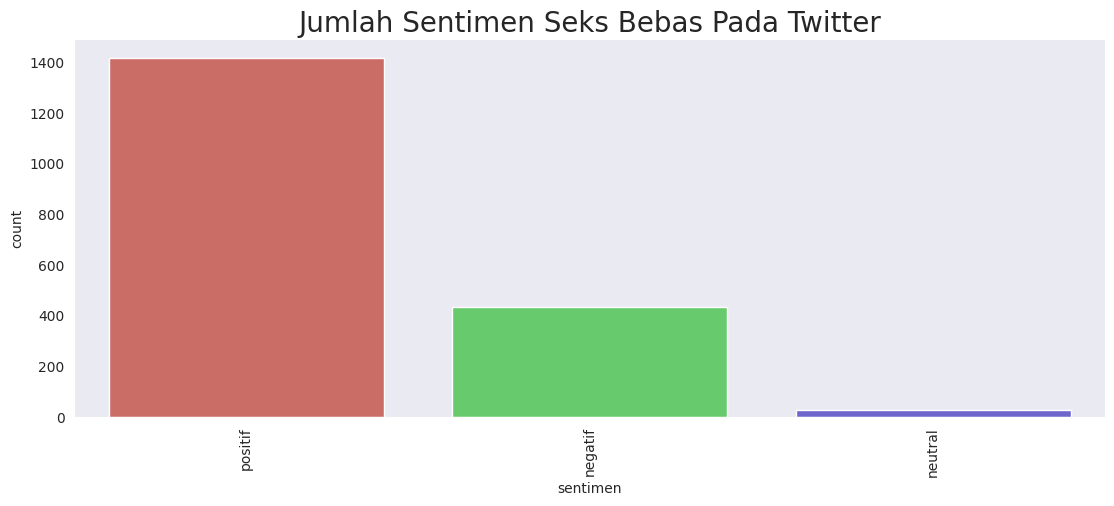

In [37]:
#lihat banyak jumlah sentimen
sns.set_style("dark")
graph = sns.catplot(data=data	, x="sentimen", kind="count", height = 4.5, aspect = 2.5, palette = "hls")
graph.set_xticklabels(rotation=90)
plt.title("Jumlah Sentimen Seks Bebas Pada Twitter", size = 20)

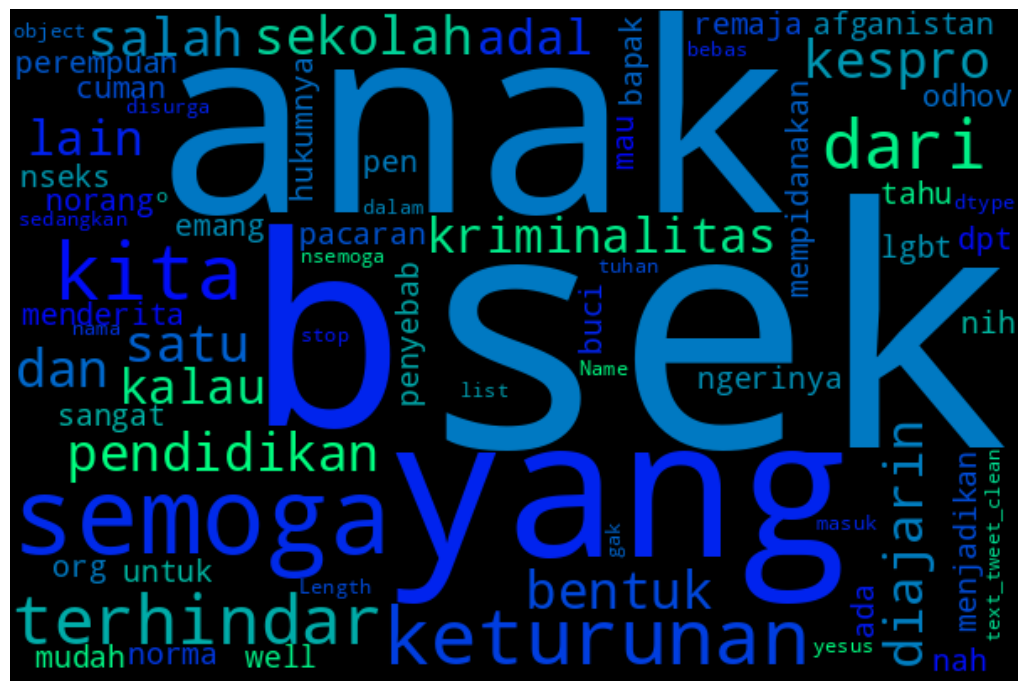

In [38]:
#WordCloud pada tweet mengenai seks bebas di indonesia selama tahun 2023
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(data["text_tweet_clean"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

# **6. Klasifikasi**

Sentimen yang dilabeli oleh vader lexicon akan diklasifikasi kembali menggunakan algoritma

**a. Naive Bayes**

In [39]:
#modul
import pandas as pd
import re
import numpy as np

In [40]:
#panggil data 
df = pd.read_csv('labelin_seksbebas.csv', encoding = 'utf-8')
df.head()

,text_tweet_clean,scores,compound,sentimen
0,semoga anak keturunan kita terhindar dari sek...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7351,positif
1,pendidikan seks dan kespro diajarin sekolah b...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6705,positif
2,salah satu bentuk kriminalitas yang lain adal...,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...",-0.7414,negatif
3,kalau afganistan anak perempuan cuman dpt pen...,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'com...",0.2023,positif
4,ngerinya pacaran remaja nseks menjadikan buci...,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'co...",-0.6808,negatif


In [41]:
#konversi sentiment ke polaritas
def convert(polarity):
    if polarity == 'positif':
        return 1
    elif polarity == 'neutral':
        return 0
    else:
        return -1
    
df['polarity'] = df['sentimen'].apply(convert)
df.head()

,text_tweet_clean,scores,compound,sentimen,polarity
0,semoga anak keturunan kita terhindar dari sek...,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7351,positif,1
1,pendidikan seks dan kespro diajarin sekolah b...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6705,positif,1
2,salah satu bentuk kriminalitas yang lain adal...,"{'neg': 0.198, 'neu': 0.715, 'pos': 0.087, 'co...",-0.7414,negatif,-1
3,kalau afganistan anak perempuan cuman dpt pen...,"{'neg': 0.104, 'neu': 0.74, 'pos': 0.157, 'com...",0.2023,positif,1
4,ngerinya pacaran remaja nseks menjadikan buci...,"{'neg': 0.202, 'neu': 0.714, 'pos': 0.084, 'co...",-0.6808,negatif,-1


In [43]:
X = df['text_tweet_clean']
y = df['polarity']

In [44]:
#BOW

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer()
print(df['text_tweet_clean'].shape)
X = bow_transformer.fit_transform(df['text_tweet_clean'].apply(lambda x: np.str_(x)))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

(1876,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (1876, 8001)
Amount of Non-Zero occurrences:  39424


In [55]:
#spliting data (membagi data menjadi data test dan data train)
#penelitian ini mencoba 80%:20% dari 1876

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=376)

In [56]:
#Klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.41      0.29      0.34        82
           0       0.00      0.00      0.00         9
           1       0.79      0.88      0.83       285

    accuracy                           0.73       376
   macro avg       0.40      0.39      0.39       376
weighted avg       0.69      0.73      0.70       376



In [57]:
#cek nilai akurasi
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.7287234042553191


In [58]:
#melihat nilai X_test atau nilai prediksi yang diklasifikasi Naive Bayes
np.array(preds)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [59]:
#melihat nilai testing yang sebenarnya
np.array(y_test)

array([ 1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  0,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  0, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1

In [61]:
np.shape(X_test) #jumlah data test yg diuji

(376, 8001)

In [62]:
np.shape(X_train) #jumlah data train

(1500, 8001)

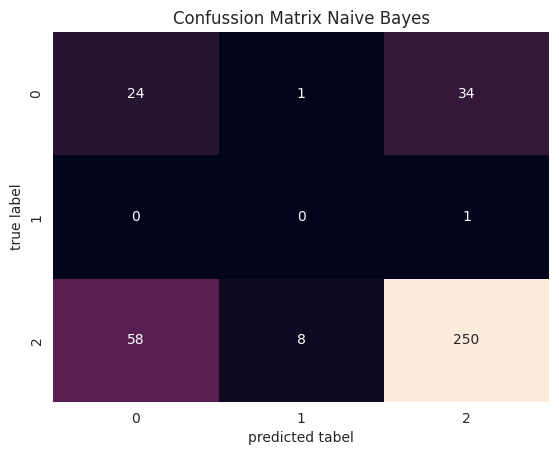

In [63]:
#CONFUSION MATRIX
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix Naive Bayes')
plt.xlabel('predicted tabel')
plt.ylabel('true label')
plt.show()

Terlihat gambar diatas, untuk True Positif (TP) sebanyak 24 data, True Netral (TNeu) sebanyak 0 data, dan True Negatif (TNeg) sebanyak 250 data

**b. Support Vector Machine**

In [64]:
#Support Vector Machine
from sklearn.svm import SVC
 
model_svm = SVC().fit(X_train, y_train) 
predicted_svm = model_svm.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_svm))

              precision    recall  f1-score   support

          -1       1.00      0.05      0.09        82
           0       0.00      0.00      0.00         9
           1       0.77      1.00      0.87       285

    accuracy                           0.77       376
   macro avg       0.59      0.35      0.32       376
weighted avg       0.80      0.77      0.68       376



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#cek nilai akurasi svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(predicted_svm, y_test)
print("Accuracy of SVM: ",score_svm)

Accuracy of SVM:  0.7686170212765957


In [66]:
#melihat nilai X_test atau nilai prediksi yang diklasifikasi svm
np.array(predicted_svm)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

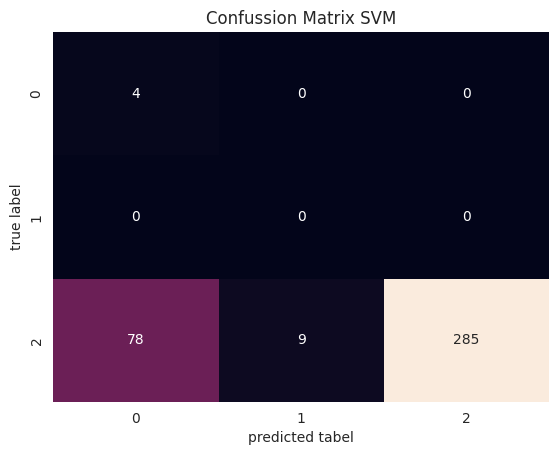

In [96]:
#CONFUSION MATRIX
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM')
plt.xlabel('predicted tabel')
plt.ylabel('true label')
plt.show()

Terlihat gambar diatas, untuk True Positif (TP) sebanyak 24 data, True Netral (TNeu) sebanyak 0 data, dan True Negatif (TNeg) sebanyak 250 data